# Medical Cost Data

The objective of this personal project is to explore medical cost data that records a patient's personal info and the cost of his or her treatment. The dataset contains information on:

     1) age
     2) sex
     3) BMI
     4) number of children
     5) smoker
     6) region within US (denoted by northeast, southeast, southwest, or northwest)
     7) charges (total cost of treatment)

In order to calculate a patient's total charge, these factors may play significant or insignificant roles. By looking more closely at this data, I hope to be able to see if it is possible to predict a patient's total cost of treatment based on his or her personal information.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('medical_insurance_costs.csv')

## Exploratory Data Analysis

I will first look at the entirety of the data set and filter out any entries that have NaN values.

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This particular data set is 100% filled with no missing values. 

Before moving on, we must first address certain categorical features like sex, smoker, etc. The idea behind this is to assign numerical values to these categorical values so that we can calculate correlation amongst all the features and ultimately include them in a predictive model. Also, if we look over the features in the data set, we can intuitively assign a certain amount of significance to factors like smoker to the total cost of treatment. Thus, we will transform all categorical features and create a revised dataset.

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#sex
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


As we can see in the overview of the revised dataset above, all the categorical values have been transformed into numerical values. For this particular transformation, I used label encoding which is a technique that assigns each label a unique integer based on alphabetical ordering.

An alternative method of converting categorical values into numerical ones is through one-hot encoding. One-hot encoding is the process of creating dummy variables and it does this by creating additional features based on the number of unique values in the categorical feature. By doing this, every unique value in that category will be added as a feature and the original category can be represented a vector that has length equal to the number of unique values.

In [7]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


Using our revised dataset, we can see the resulting correlation matrix amongst the features. At first glance, we can see that the smoker variable is highly correlated with the total costs which aligns with our initial intuition. We can also see that the next variables to look into are the age and BMI variables. The other variables seem to have little to do with the total charge amount.

## Distribution of Features

Let's now look more closely at some of the distributions for certain features.

Text(0.5, 1.0, 'Distribution of charges')

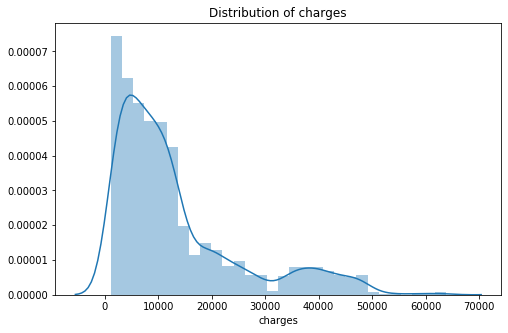

In [8]:
f, ax = plt.subplots(figsize=(8,5))
sns.distplot(df['charges'])
ax.set_title('Distribution of charges')

From the distribution of the charges feature, we can see that there are a lot more people whose treatment costs less than $20,000 than those whose treatment costs more than 20,000. Overall, it seems that paying less seems to be the norm in this data set.

Text(0.5, 1.0, 'Distribution of charges for smokers vs non-smokers')

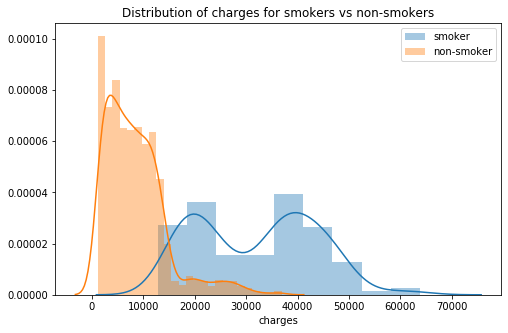

In [9]:
f, ax = plt.subplots(figsize=(8,5))
sns.distplot(df[(df.smoker == 1)]['charges'], label='smoker')
sns.distplot(df[(df.smoker == 0)]['charges'], label='non-smoker')
ax.legend()
ax.set_title('Distribution of charges for smokers vs non-smokers')

If we look at the distribution of charges for smokers vs non-smokers, we can see a clear distinction between the two types of patients. The non-smokers pay a whole lot less than the individuals that do smoke.

Text(0.5, 1.0, 'Distribution of charges for males vs females')

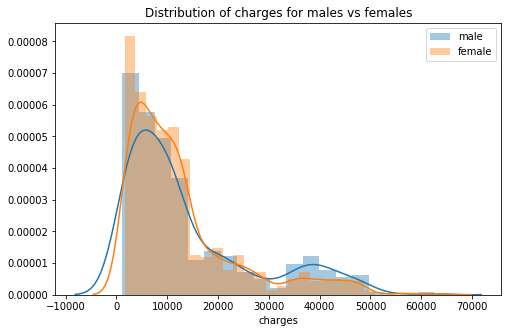

In [10]:
f, ax = plt.subplots(figsize=(8,5))
sns.distplot(df[(df.sex == 1)]['charges'], label='male')
sns.distplot(df[(df.sex == 0)]['charges'], label='female')
ax.legend()
ax.set_title('Distribution of charges for males vs females')

Here, we take a look at the distribution of charges based on sex. From our initial exploration of the data, we assumed this feature to be not as influential on the total cost and from this plot, we can also see that the distinction of sex does not vary the total charge by a significant margin.

In the plot below, we can also see the distribution of charges vs age. If we label each point by the smoker variable, we also begin to see a clearer distinction.

Text(0.5, 1.0, 'Plot of charges and age based on smoking status')

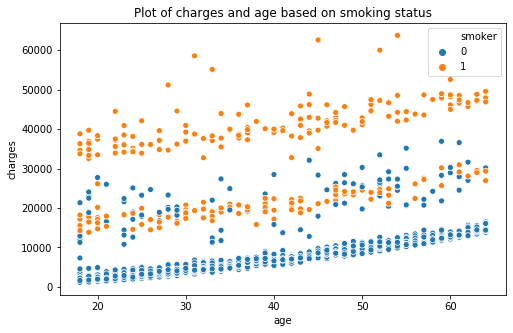

In [11]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=df.age, y=df.charges, hue=df.smoker)
ax.legend()
ax.set_title('Plot of charges and age based on smoking status')

C:\Users\Austin\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


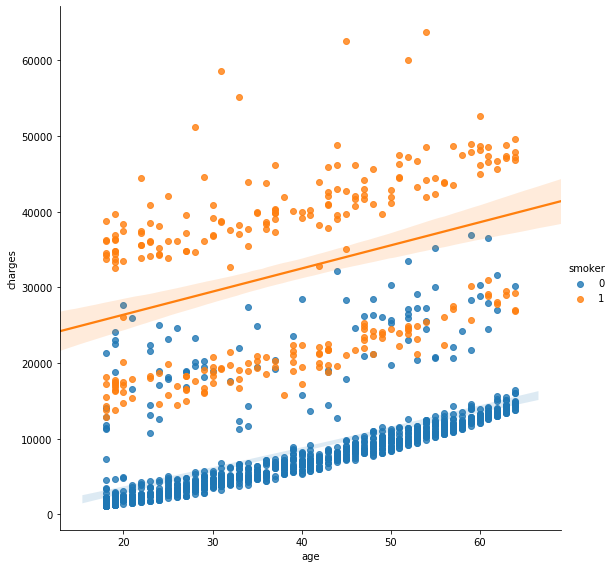

In [12]:
sns.lmplot(x="age", y="charges", hue="smoker", data = df, size = 8)

From the plots, we can see that across all ages, the charges for smokers is higher than for non-smokers.

Let's move onto another variable and look at BMI.

Text(0.5, 1.0, 'Distribution of BMI')

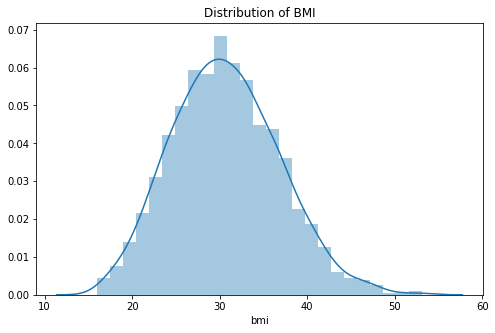

In [13]:
f, ax = plt.subplots(figsize=(8,5))
sns.distplot(df['bmi'])
ax.set_title('Distribution of BMI')

According to standard medical tables, a BMI of 30 or over is classified as obese. Intuitively, it makes sense that patients who are obese would be charged more for medical treatments. We can try to see if this is true.

Text(0.5, 1.0, 'Distribution of charges for males vs females')

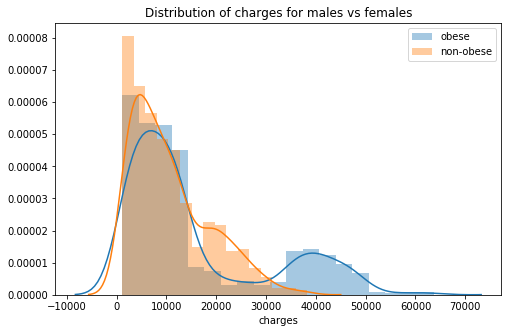

In [14]:
f, ax = plt.subplots(figsize=(8,5))
sns.distplot(df[df['bmi'] >= 30]['charges'], label='obese')
sns.distplot(df[df['bmi'] < 30]['charges'], label='non-obese')
ax.legend()
ax.set_title('Distribution of charges for males vs females')

Overall, it doesn't seem that BMI is a clear indicator of total costs. However, we can see that for non-obese patients, the distribution of charges steadily declines but for obese patients, there is a resurgence of cases for patients who have a higher total charge.

In the plot below, we can  see the distribution of charges vs BMI, labeled by smoking status

Text(0.5, 1.0, 'Plot of charges and BMI based on smoking status')

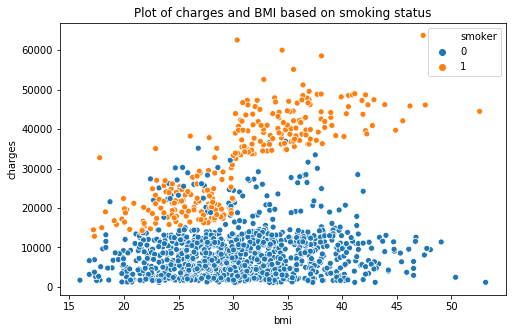

In [15]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=df.bmi, y=df.charges, hue=df.smoker)
ax.legend()
ax.set_title('Plot of charges and BMI based on smoking status')

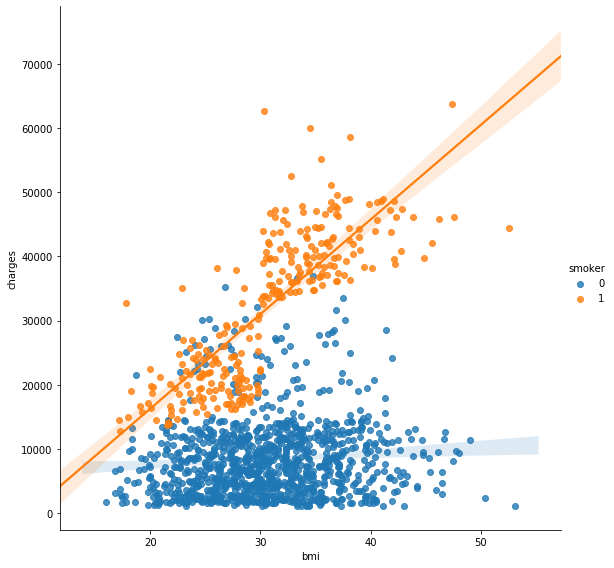

In [16]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data = df, size = 8)

Even across the BMI spectrum, we can see that the smoker variable plays a huge role in the total cost of treatment. 

## Predictive Modeling

From our previous looks into the data, we found the significance of smoking on the total charge. Now, we can try to create a model that can predict the total charge of a patient based on the personal information given.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

Let us first incorporate all the variables to predict the total charge with a regression model.

In [18]:
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
reg_model = LinearRegression().fit(x_train,y_train)

y_train_pred = reg_model.predict(x_train)
y_test_pred = reg_model.predict(x_test)

print(reg_model.score(x_test,y_test))

0.7962732059725786


In our first model, around 80% of the data fits the regression model.

In [19]:
x = df.drop(['charges'], axis = 1)
y = df.charges

poly_features = PolynomialFeatures(degree = 2)
x_poly = poly_features.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_poly,y, random_state = 0)
poly_reg_model = LinearRegression().fit(X_train,Y_train)

Y_train_pred = poly_reg_model.predict(X_train)
Y_test_pred = poly_reg_model.predict(X_test)

print(poly_reg_model.score(X_test,Y_test))

0.884628366614768


In the regression model with polynomial features, around 88% of the data fits the model.

Now, let's try creating models based only on the features that seemed significant. For this, let's try incorporating only age, BMI, and the smoker variables to predict total charges.

In [20]:
x = df[['age','bmi','smoker']]
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
reg_model = LinearRegression().fit(x_train,y_train)

y_train_pred = reg_model.predict(x_train)
y_test_pred = reg_model.predict(x_test)

print(reg_model.score(x_test,y_test))

0.7924327534321977


In [21]:
x = df[['age','bmi','smoker']]
y = df.charges

poly_features = PolynomialFeatures(degree = 2)
x_poly = poly_features.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_poly,y, random_state = 0)
poly_reg_model = LinearRegression().fit(X_train,Y_train)

Y_train_pred = poly_reg_model.predict(X_train)
Y_test_pred = poly_reg_model.predict(X_test)

print(poly_reg_model.score(X_test,Y_test))

0.8813688593065859


Interestingly enough, there is no improvement in the model even when we remove less significant variables from the model. 

In future visits to this project, I hope to compare other models and their accuracies with the regression model. If possible, I also would want to augment the data with more meaningful features to get a better understanding of how the total charge is calculated.